### **Precipitation Data**
#### Read the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = './data/234dailys.xls'

# read the data
rf = pd.read_excel(file_path,skiprows=9)
rf.rename(columns=rf.iloc[0]).drop(rf.index[0]).reset_index(drop=True)
rf['datetime'] = pd.to_datetime(rf[['year', 'month', 'day']])

rf.head(10)

,station id,water year,year,month,day,daily rain,code,datetime
0,234,1900,1899,10,11,0.12,E339,1899-10-11
1,234,1900,1899,10,12,0.08,E339,1899-10-12
2,234,1900,1899,10,13,1.30,E339,1899-10-13
3,234,1900,1899,10,14,0.02,E339,1899-10-14
4,234,1900,1899,10,21,0.46,E339,1899-10-21
5,234,1900,1899,10,30,0.08,E339,1899-10-30
6,234,1900,1899,11,14,0.92,E339,1899-11-14
7,234,1900,1899,11,15,0.15,E339,1899-11-15
8,234,1900,1899,11,16,0.10,E339,1899-11-16
9,234,1900,1899,11,21,0.80,E339,1899-11-21


In [4]:
# Year range
print('data recorded from:', int(rf.describe().year.iloc[3]), 'to:',int(rf.describe().year.iloc[7]))

data recorded from: 1899 to: 2023


#### Add attributes to dataframe


In [5]:
rf.attrs['Description'] ='County of Santa Barbara'
rf.attrs['Station id']  = 234
rf.attrs['Latitude']    = '34-25-34'
rf.attrs['Longitude']   = '119-42-13'
rf.attrs['Elevation m'] = '130 ft'

print (rf.attrs)

{'Description': 'County of Santa Barbara', 'Station id': 234, 'Latitude': '34-25-34', 'Longitude': '119-42-13', 'Elevation m': '130 ft'}


#### Group by month and find top 5% precipitation for each month

In [6]:
# ??? Question: only contains 77 0's values
rf[rf['daily rain']==0].count()['daily rain']

77

In [7]:
# Group by month and find top 5% for each month, not including the 0's
extremes = rf.loc[(rf['daily rain']!=0)].groupby('month').quantile(0.95)['daily rain']

rf['binary rain'] = rf.apply(lambda row: 1 if row['daily rain'] > extremes[row['month']] else 0, axis=1)
rf

/var/folders/qd/nfpzqtz54rx879c00hvvjfyw0000gn/T/ipykernel_65187/1219177639.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  extremes = rf.loc[(rf['daily rain']!=0)].groupby('month').quantile(0.95)['daily rain']


,station id,water year,year,month,day,daily rain,code,datetime,binary rain
0,234,1900,1899,10,11,0.12,E339,1899-10-11,0
1,234,1900,1899,10,12,0.08,E339,1899-10-12,0
2,234,1900,1899,10,13,1.30,E339,1899-10-13,1
3,234,1900,1899,10,14,0.02,E339,1899-10-14,0
4,234,1900,1899,10,21,0.46,E339,1899-10-21,0
...,...,...,...,...,...,...,...,...,...
4646,234,2023,2023,6,12,0.01,NaN,2023-06-12,0
4647,234,2023,2023,8,10,0.24,NaN,2023-08-10,0
4648,234,2023,2023,8,11,0.06,NaN,2023-08-11,0
4649,234,2023,2023,8,21,0.29,NaN,2023-08-21,1


In [8]:
# Checking
rf[(rf['month'] == 1) & (rf['daily rain'] > extremes[1])].count()['binary rain'] == rf[(rf['month'] == 1) & (rf['binary rain'] == 1)].count()['binary rain']

True

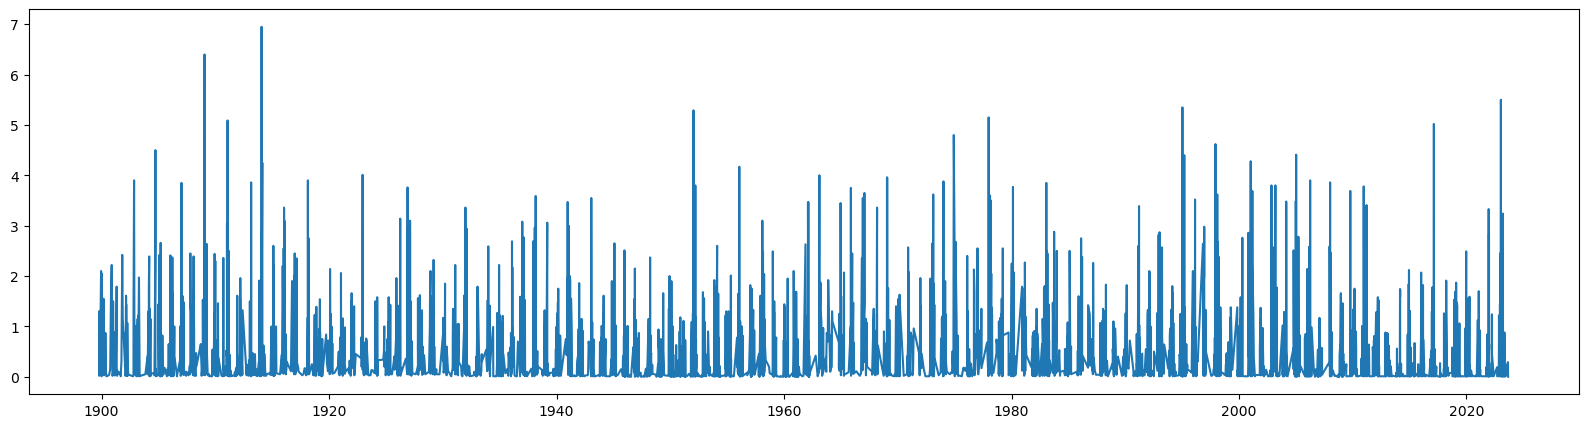

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(rf['datetime'],rf['daily rain'])

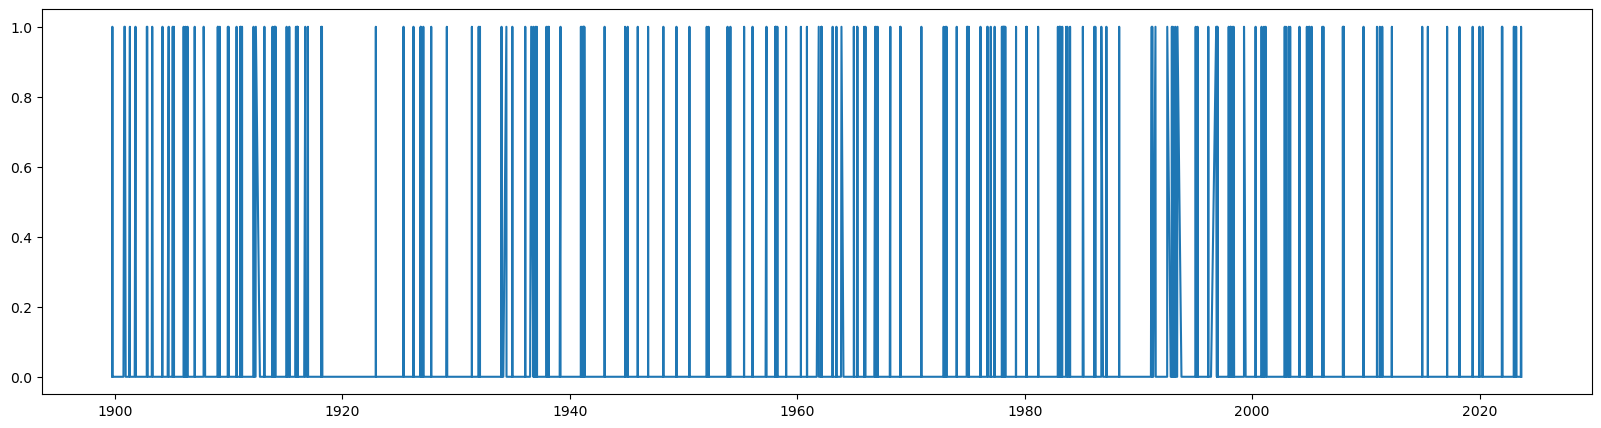

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(rf['datetime'],rf['binary rain'])

In [16]:
rf.to_csv("/Users/pippalin/Extreme-Precipitation/data/precipitation_clean")

#### Set top 5% of the precipitation distribution as extreme

1. group by month 2. exclude 0s 3. plot 4. time series of 0s and 1s
1. SOI use above 1 and -1, 1 0 -1 2. repeat everyday